In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
ImportWarning
# warnings.filterwarnings('ignore')
import keras
import tensorflow



In [2]:
from sklearn.datasets import load_iris
iris_data=load_iris(as_frame=True)
df=iris_data.frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
x=df.drop(columns=['target'])
y=df['target']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (120, 4)
x_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [5]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [6]:
import tensorflow as tf
from tensorflow import keras


In [7]:
tf.random.set_seed(42)

In [8]:
model=keras.models.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(4,)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(3,activation='softmax')
])

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.3733 - loss: 1.1246 - val_accuracy: 0.5667 - val_loss: 1.0364
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4315 - loss: 1.0266 - val_accuracy: 0.3667 - val_loss: 0.9754
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3750 - loss: 0.9736 - val_accuracy: 0.6000 - val_loss: 0.9271
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6363 - loss: 0.9208 - val_accuracy: 0.8000 - val_loss: 0.8739
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7850 - loss: 0.8632 - val_accuracy: 0.8333 - val_loss: 0.8212
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7890 - loss: 0.8092 - val_accuracy: 0.7667 - val_loss: 0.7723
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7138 - loss: 0.7616 - val_accuracy: 0.7000 - val_loss: 0.7278
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6904 - loss: 0.7188 - val_accuracy: 0.7000 - val_loss:

Text(0, 0.5, 'Accuracy')

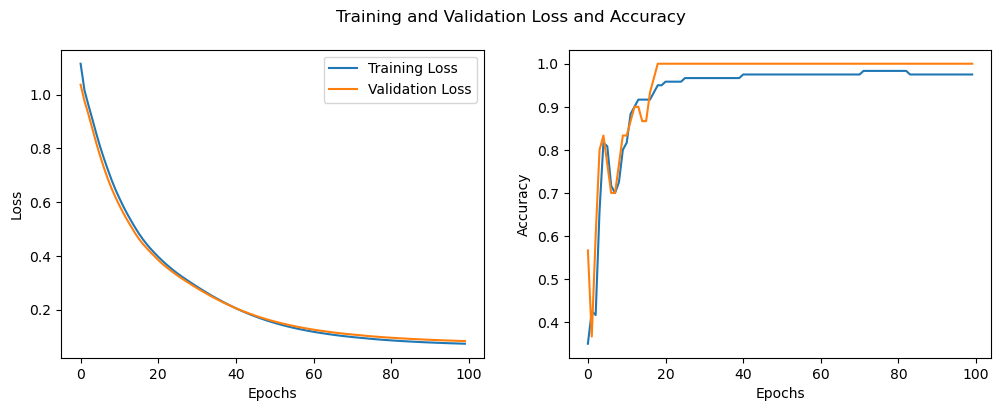

In [12]:
# plot the training and validation loss and accuracies
plt.figure(figsize=(12, 4))
plt.suptitle('Training and Validation Loss and Accuracy')
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [13]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0831
loss: 0.08306842297315598
accuracy: 1.0


In [14]:
prediction=model.predict(x_test)
predicted_labels=np.argmax(prediction,axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [15]:
prediction

array([[8.5091952e-04, 9.5897460e-01, 4.0174481e-02],
       [9.9946159e-01, 5.3841906e-04, 1.0921519e-10],
       [5.7697704e-08, 7.3176069e-04, 9.9926823e-01],
       [1.0627122e-03, 9.2528433e-01, 7.3653020e-02],
       [5.5552006e-04, 9.7218049e-01, 2.7263965e-02],
       [9.9888009e-01, 1.1198811e-03, 7.5831752e-10],
       [6.1943741e-03, 9.9215955e-01, 1.6460514e-03],
       [6.7824527e-05, 1.5361117e-01, 8.4632105e-01],
       [4.9968442e-04, 5.4863822e-01, 4.5086217e-01],
       [2.1900365e-03, 9.9473393e-01, 3.0759939e-03],
       [1.8290558e-04, 3.3587861e-01, 6.6393852e-01],
       [9.9842787e-01, 1.5721801e-03, 2.7955371e-09],
       [9.9963343e-01, 3.6650413e-04, 1.0247675e-10],
       [9.9845576e-01, 1.5441844e-03, 2.1710977e-09],
       [9.9948251e-01, 5.1748601e-04, 2.2364667e-10],
       [8.6029421e-04, 9.6983194e-01, 2.9307768e-02],
       [1.0937692e-06, 3.6592758e-03, 9.9633968e-01],
       [2.2472001e-03, 9.9123996e-01, 6.5128594e-03],
       [1.1930682e-03, 9.172

In [16]:
predicted_labels

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)